# Laplace filter in frequency domain
## Homework 3, Exercise 1


Your task in this exercise is to create your own implementation of a
Laplace filter in Fourier space and apply it to an image.
The formula for the Laplacian in the Fourier domain is:


$$
    L(u,v) = -4*\pi^2*(u^2+v^2)
$$


Source: (Gonzalez, chapter 4, p286)

**Task:** You need to replace the `???` in the code with the required commands

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Load venice.jpg image using imread, normalize it to (0, 1)


In [2]:
img = plt.imread('venice.jpg')
img = img[:,:,0]
img = (img - np.min(img))/(np.max(img) - np.min(img))

Plot the image before applying the filter

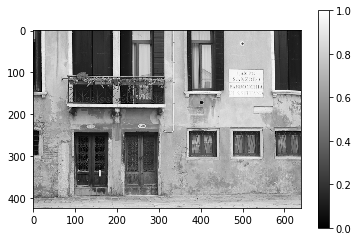

In [3]:
plt.figure(1)
plt.imshow(img, cmap='gray')
plt.colorbar()

Generate a coordinate systems with the discrete Fourier transform sample
frequencies `u` and `v`. You can use the numpy function linspace to do it
manually or `fftfreq`. Look up the documentation to get familiar with the
parameters of these functions.

In [4]:
v = np.fft.fftfreq(img.shape[0])
u = np.fft.fftfreq(img.shape[1])

The function `np.meshgrid` creates coordinate arrays for the v and the u
coordinates and writes them into vv and uu
you can display them with `plt.figure(); plt.imshow(uu); colorbar()` if you
want to have a look at them

In [5]:
vv, uu = np.meshgrid(v, u, indexing='ij')

Caluclate the filter function `L(v, u)`
If you want to do this in one line use vv and uu, as they are both of the
image shape. The formula is given in the very top documentation of this
script. Check if `L` has the same shape as the image.

In [6]:
L = -4*np.square(np.pi)*(np.square(uu)+np.square(vv))
L.shape

(424, 640)

Calculate the Fourier transform of the image
You can use the numpy function `fft2` included in  [np.fft](https://docs.scipy.org/doc/numpy/reference/routines.fft.html)

In [7]:
img_ft = np.fft.fft2(img)
img_ft.shape

(424, 640)

Multiply the Fourier transform of the image by the filter function
Take care (if neccessary) to center the potential function L around the top
left corner of the image, because Fourier transforms in python always have
the central frequencies in the top left corner. Therefore, play with the
function fftshift and ifftshift to see what it does. Check out the looks of
the shifted and unshifted potential function L.

Take the inverse Fourier transform of the product to get the filtered image
and select the real part of it, as we do not want to have the imaginary part of real images.

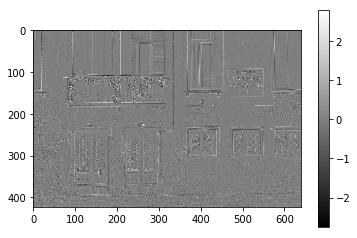

In [8]:
img_filtered =  np.real(np.fft.ifft2(img_ft * L))
plt.figure(2)
plt.imshow(img_filtered,cmap = 'gray')
plt.colorbar()